# Exercício para CP1

Importação das bibliotecas e/ou módulos (packages ou pacotes) necessários.

In [862]:
# Importar as bibliotecas necessárias
import pandas as pd
# https://pandas.pydata.org/
import numpy as np

import seaborn as sns
from sklearn import preprocessing

# Pacotes para avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Conversão de dados categóricos em numéricos
from sklearn.preprocessing import LabelEncoder
# https://scikit-learn.org/stable/modules/preprocessing.html

# Algoritmos de classificação
# KNN (K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Seleção de dados de treino e teste
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Obtenção da acurácia do modelo
from sklearn.metrics import accuracy_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

# Importação dos dados

https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy/data

<p>Uncover this dataset showcasing sustainable energy indicators and other useful factors across all countries from 2000 to 2020. Dive into vital aspects such as electricity access, renewable energy, carbon emissions, energy intensity, Financial flows, and economic growth. Compare nations, track progress towards Sustainable Development Goal 7, and gain profound insights into global energy consumption patterns over time.</p>

- Energy Consumption Prediction: Predict future energy usage, aid planning, and track SDG 7 progress.
- Carbon Emission Forecasting: Forecast CO2 emissions, support climate strategies.
- Energy Access Classification: Categorize regions for infrastructure development, understand sustainable energy's role.
- Sustainable Development Goal Tracking: Monitor progress towards Goal 7, evaluate policy impact.
- Energy Equity Analysis: Analyze access, density, and growth for equitable distribution.
- Energy Efficiency Optimization: Identify intensive areas for environmental impact reduction.
- Renewable Energy Potential Assessment: Identify regions for green investments based on capacity.
- Renewable Energy Investment Strategies: Guide investors towards sustainable opportunities.

In [863]:
# Criar um Pandas Data Frame a partir do arquivo de dados csv
dados = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv')
dados

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


Análise Exploratória

In [864]:
# Quantos registros (linhas) e quantos atributos (colunas) tem o Data Frame?
dados.shape

print(f'O conjunto de dados tem {dados.shape[0]} linhas e {dados.shape[1]} colunas.')

O conjunto de dados tem 3649 linhas e 21 colunas.


In [865]:
# Visualizar as primeiras linhas
dados.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [866]:
# Visualizar as últimas linhas
dados.tail()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.6802,10.00,11020.00046,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.0115,9.51,10340.00015,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.9858,9.83,12380.00011,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.6553,10.47,11760.00023,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857
3648,Zimbabwe,2020,52.747670,30.4,80.61,30000.0,81.90,3.40,0.0,4.19,...,2680.1318,10.00,NaN,NaN,-6.248748,1214.509820,38,390757.0,-19.015438,29.154857


In [867]:
# Nomes das colunas
dados.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [868]:
# Informações do formato de dados das colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [869]:
# Estatísticas descritivas das colunas numéricas
dados.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


Pré Processamento

In [870]:
dados.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [871]:
dados_cleaned = dados.iloc[:,6:10]

In [872]:
dados_cleaned.dropna(inplace=True)
dados_cleaned

,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh)
0,44.99,0.16,0.0,0.31
1,45.60,0.09,0.0,0.50
2,37.83,0.13,0.0,0.56
3,36.66,0.31,0.0,0.63
4,44.24,0.33,0.0,0.56
...,...,...,...,...
3644,81.90,3.50,0.0,3.32
3645,82.46,3.05,0.0,4.30
3646,80.23,3.73,0.0,5.46
3647,81.50,3.66,0.0,4.58


In [873]:
# Renomeando colunas
dados_cleaned.rename(columns={'Renewable energy share in the total final energy consumption (%)': 'Total Consumption'}, inplace=True)
dados_cleaned.rename(columns={'Electricity from fossil fuels (TWh)': 'Fossil Fuel'}, inplace=True)
dados_cleaned.rename(columns={'Electricity from nuclear (TWh)': 'Nuclear'}, inplace=True)
dados_cleaned.rename(columns={'Electricity from renewables (TWh)': 'Renewables'}, inplace=True)


In [874]:
dados_cleaned

,Total Consumption,Fossil Fuel,Nuclear,Renewables
0,44.99,0.16,0.0,0.31
1,45.60,0.09,0.0,0.50
2,37.83,0.13,0.0,0.56
3,36.66,0.31,0.0,0.63
4,44.24,0.33,0.0,0.56
...,...,...,...,...
3644,81.90,3.50,0.0,3.32
3645,82.46,3.05,0.0,4.30
3646,80.23,3.73,0.0,5.46
3647,81.50,3.66,0.0,4.58


# GRÁFICOS DE DISPERSÃO, BOXPLOTS E HISTOGRAMAS

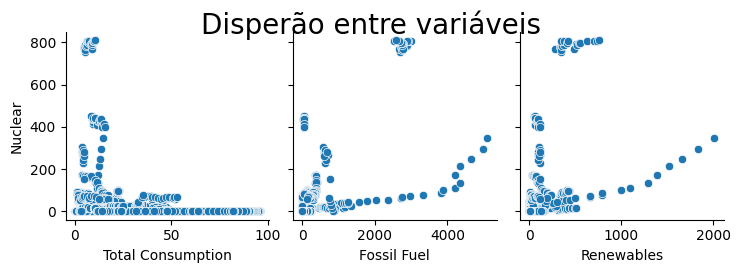

In [875]:
# gráfico de dispersão

ax = sns.pairplot(dados_cleaned, y_vars='Nuclear', x_vars=['Total Consumption', 'Fossil Fuel', 'Renewables'])
ax.fig.suptitle('Disperão entre variáveis', fontsize=20, y=1.05)
ax


<Axes: >

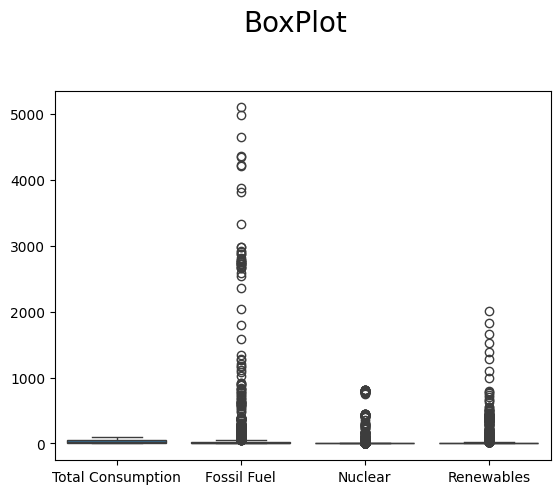

In [876]:
# prompt: generate boxplot from dados_cleaned

bp = sns.boxplot(dados_cleaned)
plt.suptitle('BoxPlot', fontsize=20, y=1.05)
bp

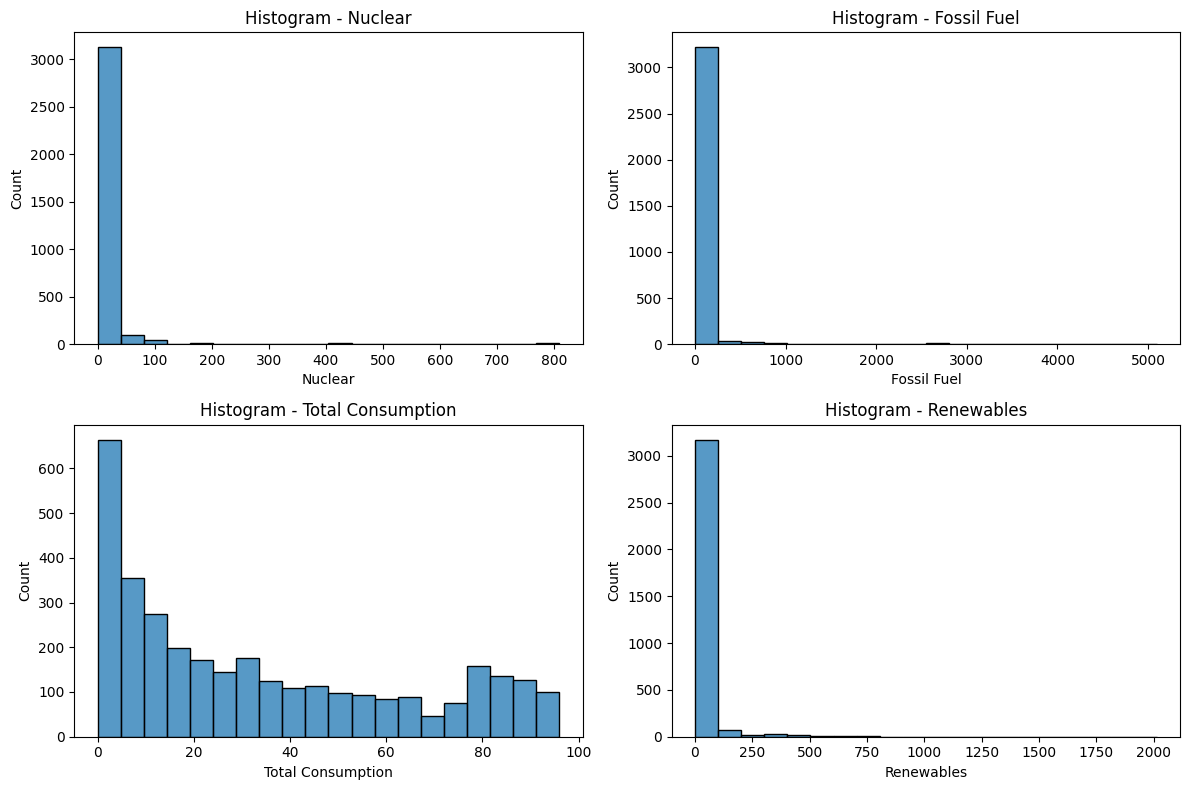

In [877]:
# prompt: generate histogram from dados_cleaned

columns_to_plot = ['Nuclear', 'Fossil Fuel', 'Total Consumption', 'Renewables']

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each column and plot the histogram
for i, column in enumerate(columns_to_plot):
    sns.histplot(dados_cleaned, x=column, bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram - {column}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


# Matriz de Correlação entre variáveis

In [878]:
# matriz de correlação
dados_cleaned.corr().round(4)

,Total Consumption,Fossil Fuel,Nuclear,Renewables
Total Consumption,1.0000,-0.1323,-0.1365,-0.0725
Fossil Fuel,-0.1323,1.0000,0.6453,0.8409
Nuclear,-0.1365,0.6453,1.0000,0.4856
Renewables,-0.0725,0.8409,0.4856,1.0000


# CRIAR UMA FUNÇÃO PARA TRATAMENTO DE OUTLIERS (SUGESTÃO: utilize IQR)

In [879]:
# prompt: CRIAR UMA FUNÇÃO PARA TRATAMENTO DE OUTLIERS (SUGESTÃO: utilize IQR)

import numpy as np

def remove_outliers_IQR(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])

    df.dropna(inplace=True)
    return df

In [880]:
# remove_outliers_IQR(dados_cleaned)

# PADRONIZAÇÃO (Standard Scaler) E/OU NORMALIZAÇÃO (MinMaxScaler) DAS COLUNAS

In [881]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standardize the columns of the DataFrame in-place
dados_cleaned[dados_cleaned.columns] = scaler.fit_transform(dados_cleaned)

print("DataFrame Padronizado:")
print(dados_cleaned)


DataFrame Padronizado:
      Total Consumption  Fossil Fuel   Nuclear  Renewables
0              0.386485    -0.196509 -0.184925   -0.231406
1              0.406800    -0.196710 -0.184925   -0.229510
2              0.148033    -0.196595 -0.184925   -0.228912
3              0.109068    -0.196078 -0.184925   -0.228213
4              0.361507    -0.196020 -0.184925   -0.228912
...                 ...          ...       ...         ...
3644           1.615711    -0.186913 -0.184925   -0.201372
3645           1.634361    -0.188206 -0.184925   -0.191594
3646           1.560095    -0.186252 -0.184925   -0.180020
3647           1.602390    -0.186453 -0.184925   -0.188800
3648           1.615711    -0.187200 -0.184925   -0.192692

[3335 rows x 4 columns]


# Separando os dados em features (X) and labels (y)

In [882]:
# Separação dos dados de entrada e dados de saída
# X maiúsculo ----> Dados de entrada / Features / Variáveis independentes
# y minúsculo ----> Dados de saída / Target (alvo) / Variável dependente
# dados.iloc[linhas, colunas]
X = dados_cleaned.iloc[:, [0, 1, 3]] # Todas as linhas e as colunas de 6, 7, 9
X.head()

,Total Consumption,Fossil Fuel,Renewables
0,0.386485,-0.196509,-0.231406
1,0.406800,-0.196710,-0.229510
2,0.148033,-0.196595,-0.228912
3,0.109068,-0.196078,-0.228213
4,0.361507,-0.196020,-0.228912


In [883]:
X.values

array([[ 0.38648482, -0.19650863, -0.23140601],
       [ 0.40679986, -0.19670973, -0.2295102 ],
       [ 0.14803284, -0.19659481, -0.22891153],
       ...,
       [ 1.56009485, -0.18625214, -0.18001962],
       [ 1.6023901 , -0.18645325, -0.1888002 ],
       [ 1.61571144, -0.18720022, -0.1926916 ]])

In [884]:
# Dados de saída
y = dados_cleaned['Nuclear']
y

0      -0.184925
1      -0.184925
2      -0.184925
3      -0.184925
4      -0.184925
          ...   
3644   -0.184925
3645   -0.184925
3646   -0.184925
3647   -0.184925
3648   -0.184925
Name: Nuclear, Length: 3335, dtype: float64

# Separando dados para treinamento e testes

In [885]:
# Separação em dados de treino e dados de teste
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# SEED
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [886]:
X_train.shape

(2334, 3)

In [887]:
X_test.shape

(1001, 3)

# Treinando os modelos (método fit)

In [888]:
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [889]:
SVC_model = SVC()
SVC_model.fit(X_train, y_train)

SVC()

In [890]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

# Testando os modelos (método predict)

In [891]:
# Método Predict
SVC_prediction = SVC_model.predict(X_test)

In [892]:
SVC_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [893]:
KNN_prediction = KNN_model.predict(X_test)

In [894]:
KNN_prediction

array([0, 0, 0, ..., 9, 0, 0])

# Mostrando os resultados

## Algoritmo SVC

### Acuracia (Accuracy)

In [895]:
# Resolvendo problema de "cannot handle a mix of multiclass and continuous targets"
print(y_test.dtype)
print(SVC_prediction.dtype)
y_test = y_test.astype(int)
print(y_test.dtype)
print(SVC_prediction.dtype)

float64
int64
int64
int64


In [896]:
acuracia_svc = (accuracy_score(SVC_prediction, y_test)*100)

In [897]:
print(f'Acurácia do modelo SVC: {acuracia_svc: .2f} %')

Acurácia do modelo SVC:  97.10 %


## Confusion Matrix

In [898]:
print(confusion_matrix(SVC_prediction, y_test))

[[972   5   4   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0

## Relatório de classificação

In [899]:
print(classification_report(SVC_prediction, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       985
           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
         107       0.00      0.00      0.00         1
         125       0.00      0.00      0.00         1
         199       0.00      0.00      0.00         1
         277       0.00      0.00      0.00         1
         283       0.00      0.00      0.00         1
         295       0.00      0.00      0.00         1
         320       0.00      0.00      0.00         1
         366       0.00      0.00      0.00         1
         370       0.00      0.00      0.00         1
         373       0.00      0.00      0.00         2
         374       0.00      0.00      0.00         3
         375       0.00      0.00      0.00         1
         376       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

## Algoritmo KNN

### Acuracia (accuracy)

In [900]:
acuracia_knn = (accuracy_score(KNN_prediction, y_test)*100)

In [901]:
print(f'Acurácia do modelo KNN: {acuracia_knn: .2f} %')

Acurácia do modelo KNN:  91.01 %


### Confusion Matrix

In [902]:
print(confusion_matrix(KNN_prediction, y_test))

[[911   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


### Relatório de classificação

In [903]:
print(classification_report(KNN_prediction, y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       911
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         2
          32       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         2
          58       0.00      0.00      0.00         3
          63       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

# Utilizando os modelos para fazer uma previsão de classificação

In [904]:
xnew = [[6.7, 2.9, 5],[3, 2, 5]]
ynew = SVC_model.predict(xnew)
ynew

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0, 0])

In [905]:
xnew = [[6.7, 2.9, 5],[3, 2, 5]]
ynew = KNN_model.predict(xnew)
ynew

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([123, 125])

EXERCÍCIO: Treine um outro modelo usando o algoritmo Decision Tree e compare as métricas